C:\Users\Ken.Pryor\AppData\Local\Temp\1\ipykernel_30408\3451167135.py:17: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above


Frequency:  [ 23.8    31.4    50.3    52.799  53.595  54.4    54.941  55.499  57.29
  57.29   57.29   57.29   57.29   57.29   89.     89.    157.    183.311
 183.311 190.311]
GWP =  [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
TB16 mean =  237.1632088888889
TB17 mean =  257.33391851851854
TB20 mean =  265.9266540740741
CLW mean =  0.009527037037037037
GWP mean =  0.002592207507934771
Lats mean=  -7.240361
Lons mean=  -52.76588
GWP filled =  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
TB20_mask_ma1 = [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]] (300, 90)
TB16 max = 284.71
TB16 min = 174.59
TB16 =  [[243.25

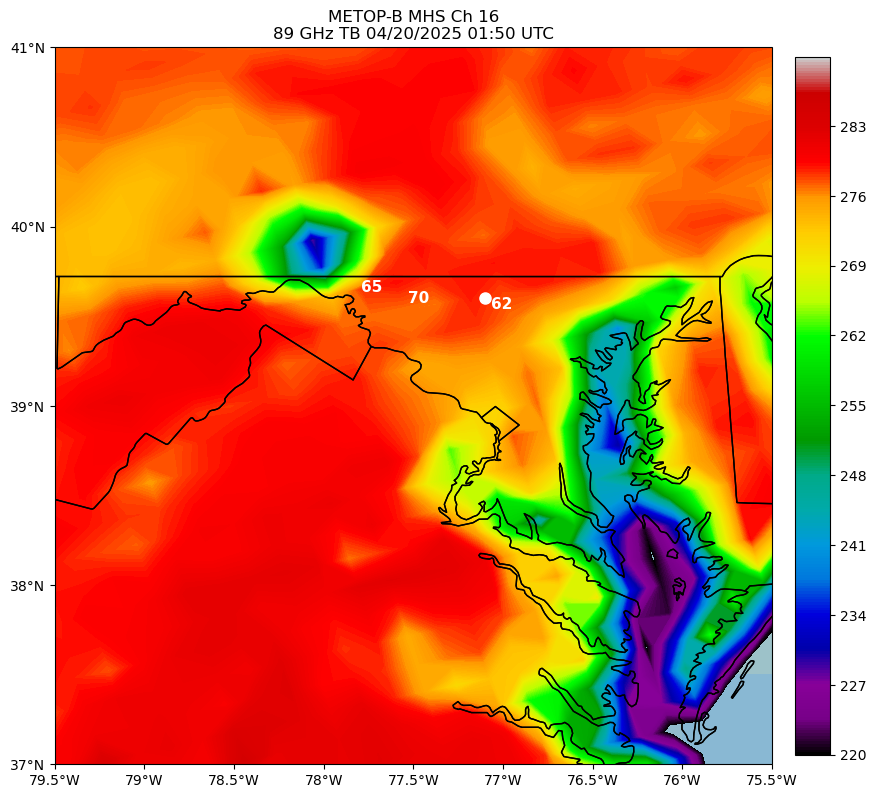

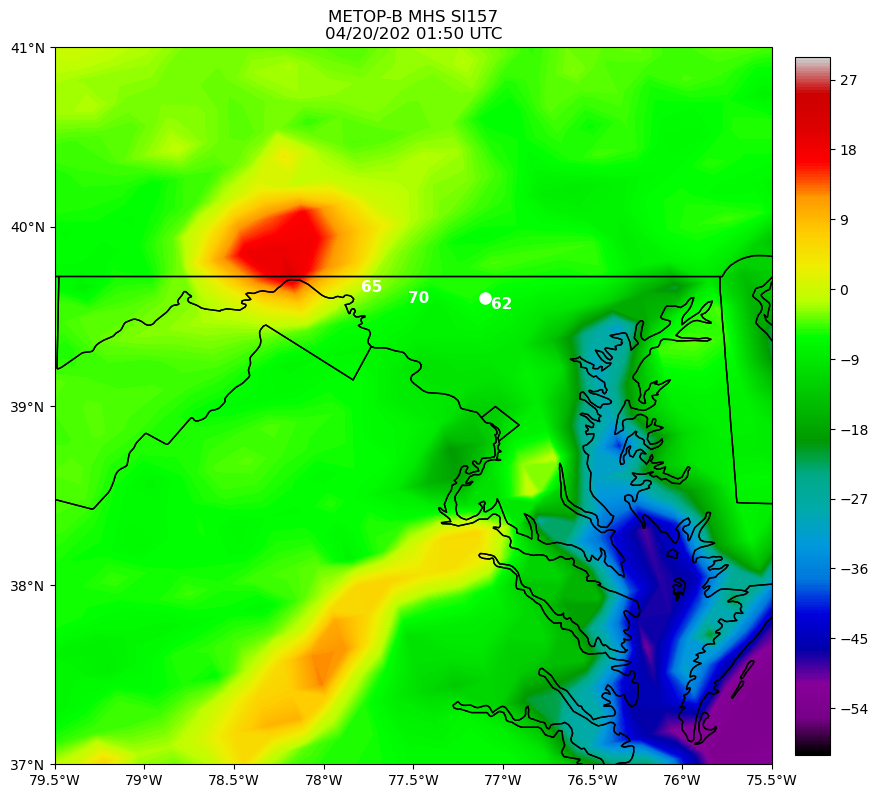

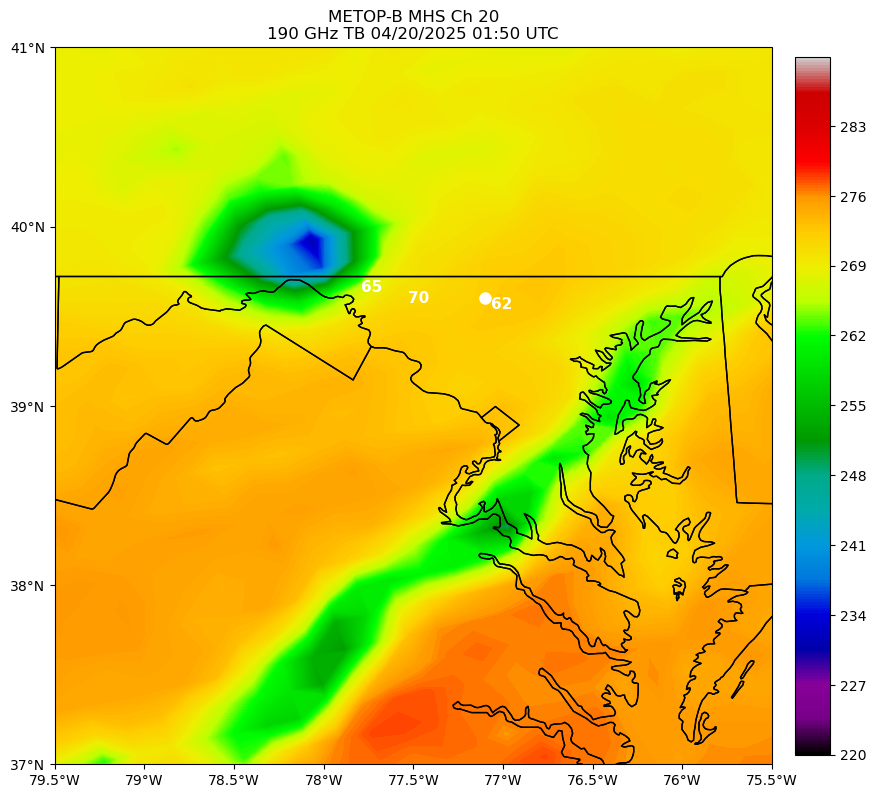

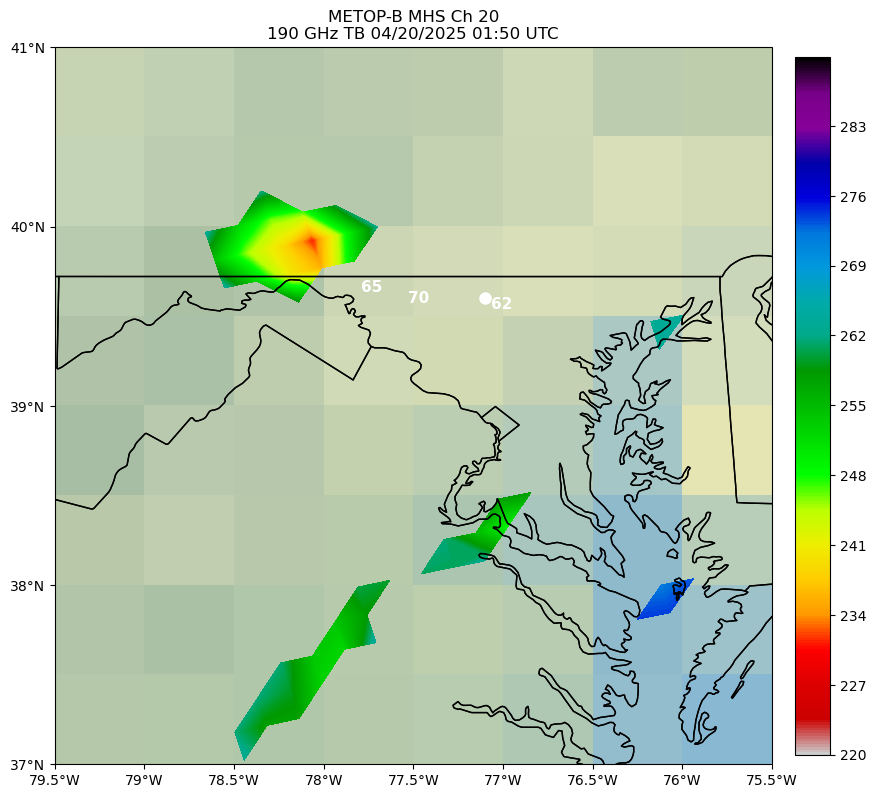

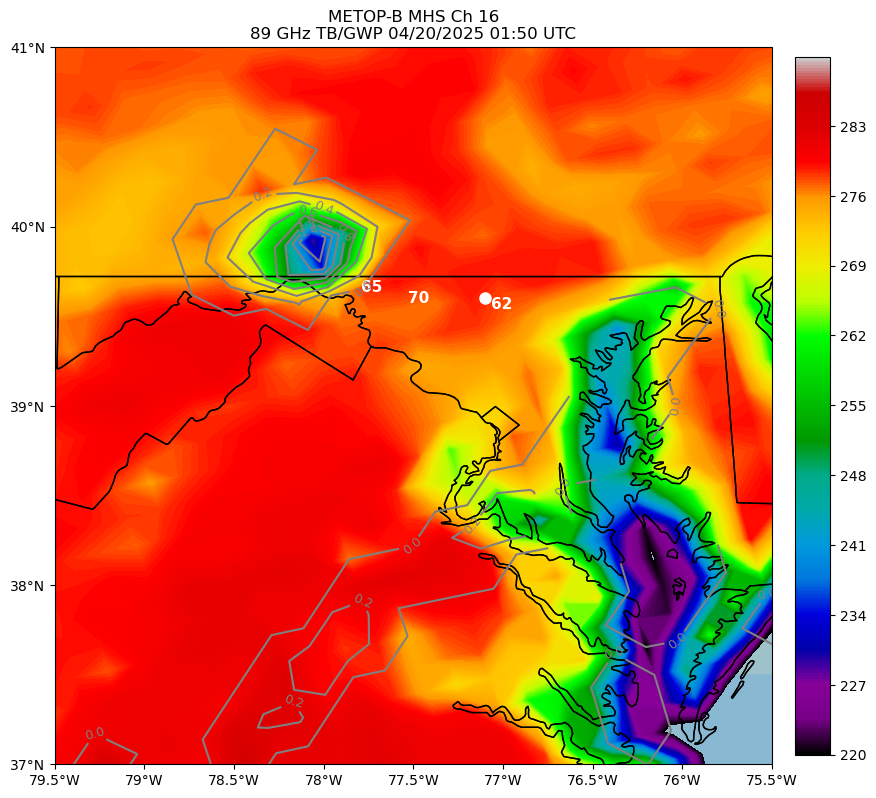

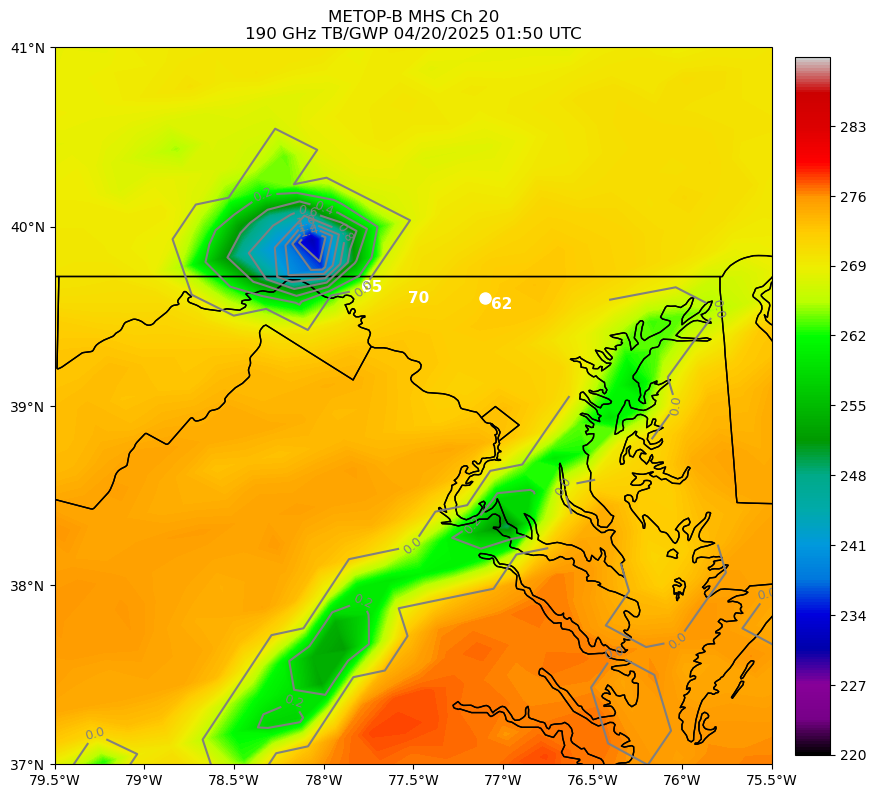

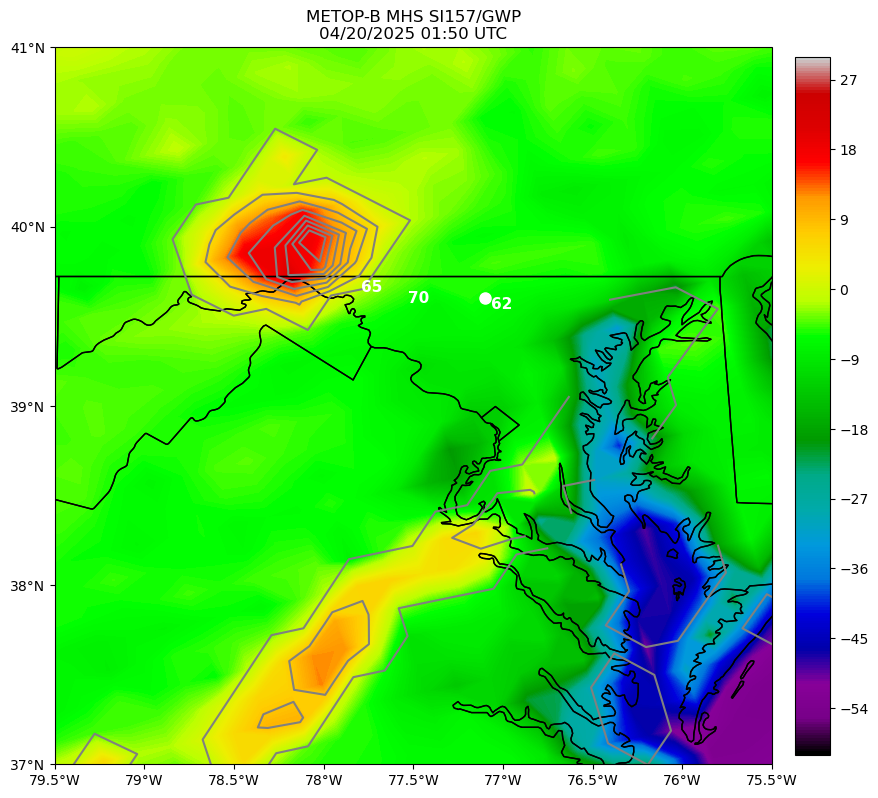

In [2]:
from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset 
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above
    freq = nc_fid.variables["Freq"][:]
    clw = nc_fid.variables["CLW"][:]
    gwp = nc_fid.variables["GWP"][:]
    lats = nc_fid.variables['Latitude'][:]  # extract/copy the data
    lons = nc_fid.variables['Longitude'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB, freq, clw, gwp, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

MHS_file = 'NPR-MIRS-IMG_v11r9_ma1_s202504200108400_e202504200205490_c202504200242340.nc'
TB, freq, clw, gwp, lats, lons, names = read_MHS_plot(MHS_file)
print("Frequency: ", freq)
TB16 = TB[850:1150,:,15]
TB17 = TB[850:1150,:,16]
TB20_ma1 = TB[850:1150,:,19]
clw = clw[850:1150,:]
gwp = gwp[850:1150,:]
print("GWP = ", gwp)
lats_ma1 = lats[850:1150,:]
lons_ma1 = lons[850:1150,:]
TB16_mn = np.mean(TB16)
TB17_mn = np.mean(TB17)
TB20_ma1_mn = np.mean(TB20_ma1)
clw_mn = np.mean(clw)
gwp_mn = np.mean(gwp)
lats_ma1_mn = np.mean(lats)
lons_ma1_mn = np.mean(lons)
print("TB16 mean = ", TB16_mn)
print("TB17 mean = ", TB17_mn)
print("TB20 mean = ", TB20_ma1_mn)
print("CLW mean = ", clw_mn)
print("GWP mean = ", gwp_mn)
print("Lats mean= ", lats_ma1_mn)
print("Lons mean= ", lons_ma1_mn)
TB16_max = np.amax(TB16)
TB16_min = np.amin(TB16)
TB17_max = np.amax(TB17)
TB17_min = np.amin(TB17)
TB20_ma1_max = np.amax(TB20_ma1)
TB20_ma1_min = np.amin(TB20_ma1)
gwp_filled_arr = gwp.filled(-1)
print("GWP filled = ", gwp_filled_arr)
TB20_mask_ma1 = ma.masked_where(gwp_filled_arr < 0.01, TB20_ma1)
print('TB20_mask_ma1 =', TB20_mask_ma1, TB20_mask_ma1.shape)
clw_min = np.amin(clw)
clw_max = np.amax(clw)
gwp_filled_arr_min = np.amin(gwp_filled_arr)
gwp_filled_arr_max = np.amax(gwp_filled_arr)
print("TB16 max =", TB16_max)
print("TB16 min =", TB16_min)
print("TB16 = ", TB16, TB16.shape)
print("TB17 max =", TB17_max)
print("TB17 min =", TB17_min)
print("TB17 = ", TB17, TB17.shape)
print("CLW max =", clw_max)
print("CLW min =", clw_min)
print("CLW = ", clw, clw.shape)
print("GWP max =", gwp_filled_arr_max)
print("GWP min =", gwp_filled_arr_min)
print("GWP = ", gwp_filled_arr, gwp_filled_arr.shape)
print("Lats = ", lats_ma1, lats_ma1.shape)
print("Lons = ", lons_ma1, lons_ma1.shape)

SI157 = TB16 - TB17
SI157_max = np.amax(SI157)
SI157_min = np.amin(SI157)
print("SI157 max =", SI157_max)
print("SI157 min =", SI157_min)
print("SI157 = ", SI157, SI157.shape)

"""
fn = 'C:/temp/test.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

time = ds.createDimension('time', None)
lats = ds.createDimension('lats', 200, 90)
lons = ds.createDimension('lons', 200, 90)

times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('lats', 'f4', ('lats',))
lons = ds.createVariable('lons', 'f4', ('lons',))
SI157 = ds.createVariable('SI157', 'f4', ('time', 'lat', 'lon',))
SI157.units = 'K'

print('var size after adding second data', SI157.shape)

ds.close()
"""
fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS Ch 16\n'
          '89 GHz TB 04/20/2025 01:50 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma1, lats_ma1, TB16, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB16_0150.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS SI157\n'
          '04/20/202 01:50 UTC')
levels = np.arange(-60,30,0.1)
mi = ax.contourf(lons_ma1, lats_ma1, SI157, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_SI157_0150.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS Ch 20\n'
          '190 GHz TB 04/20/2025 01:50 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma1, lats_ma1, TB20_ma1, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_0150.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS Ch 20\n'
          '190 GHz TB 04/20/2025 01:50 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma1, lats_ma1, TB20_mask_ma1, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_mask_0150.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS Ch 16\n'
          '89 GHz TB/GWP 04/20/2025 01:50 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma1, lats_ma1, TB16, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons_ma1,lats_ma1,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB16_GWP_0150.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS Ch 20\n'
          '190 GHz TB/GWP 04/20/2025 01:50 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma1, lats_ma1, TB20_ma1, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons_ma1,lats_ma1,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_GWP_0150.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS SI157/GWP\n'
          '04/20/2025 01:50 UTC')
levels = np.arange(-60,30,0.1)
mi = ax.contourf(lons_ma1, lats_ma1, SI157, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons_ma1,lats_ma1,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_SI157_GWP_0150.png",dpi=250,bbox_inches='tight')
plt.show()

C:\Users\Ken.Pryor\AppData\Local\Temp\1\ipykernel_30408\969695505.py:17: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above


Frequency:  [ 23.8    31.4    50.3    52.799  53.595  54.4    54.941  55.499  57.29
  57.29   57.29   57.29   57.29   57.29   89.     89.    157.    183.311
 183.311 190.311]
TB16 mean =  249.80768703703706
TB17 mean =  268.61139185185186
TB20 mean =  270.9865581481482
CLW mean =  0.009207407407407407
GWP mean =  0.006596212154501912
Lats mean=  0.6508295
Lons mean=  16.028522
GWP filled =  [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1. -1. -1.]
 [ 0.  0.  0. ... -1. -1. -1.]
 [ 0.  0.  0. ... -1. -1. -1.]]
TB20_mask_ma3 = [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]] (300, 90)
TB16 max = 289.38
TB16 min = 175.66
TB16 =  [[269.38 268.73 274.43 ... 264.85 265.3  266.24]
 [269.89 269.77 277.43 ... 264.54 265.35 266.  ]
 [270.25 271.41 282.35 ... 264.76 266.41 267.54]
 ...
 [263.35 264.18 264.49 ... 231.41 24

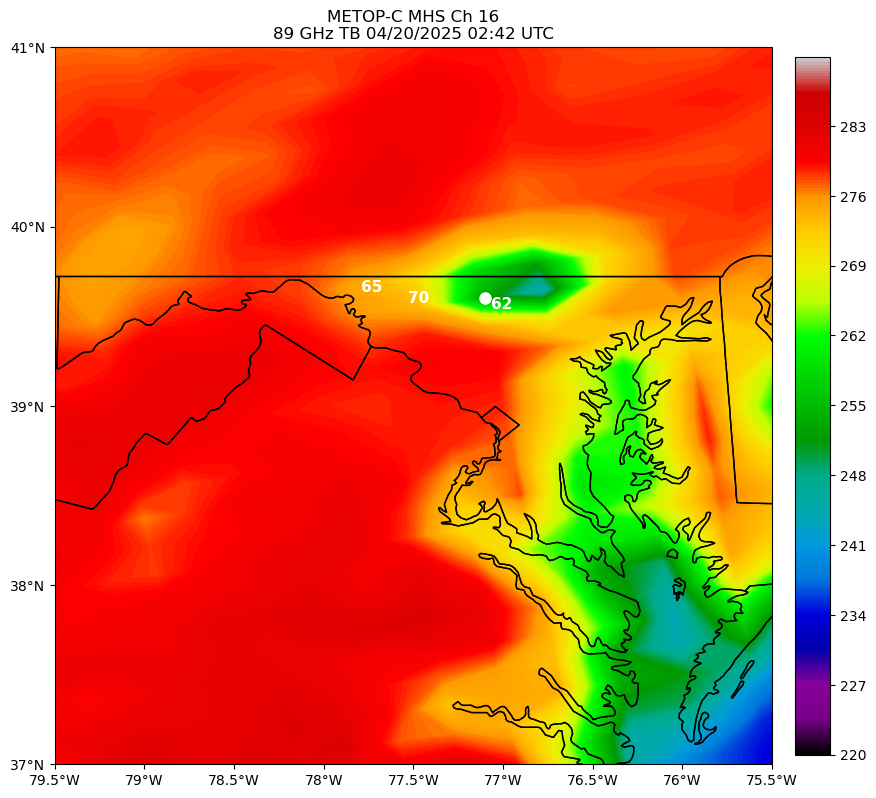

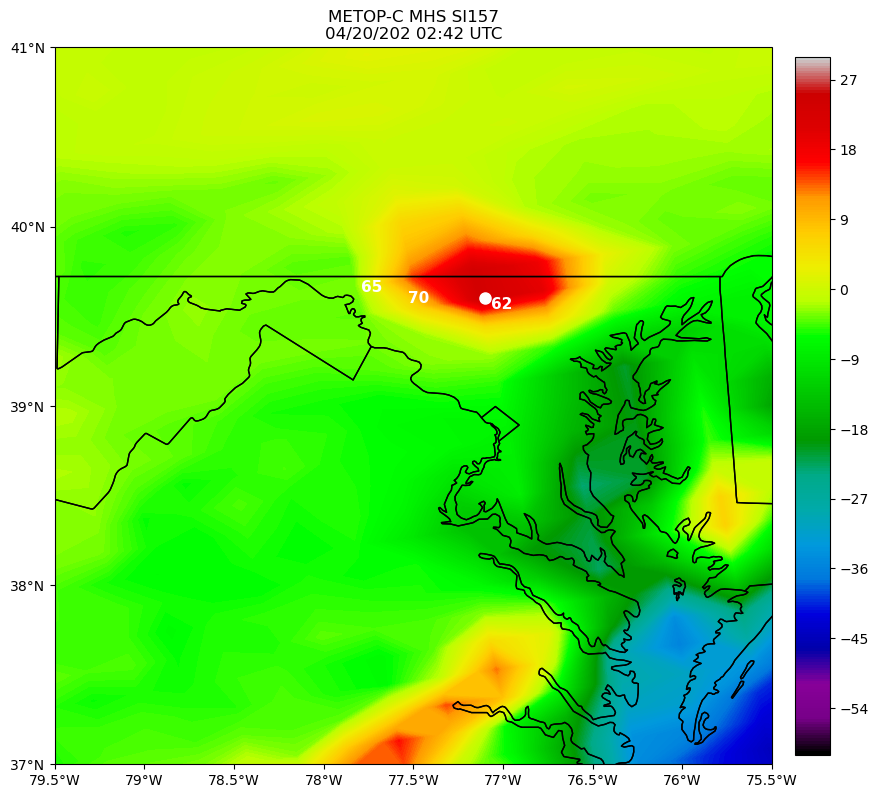

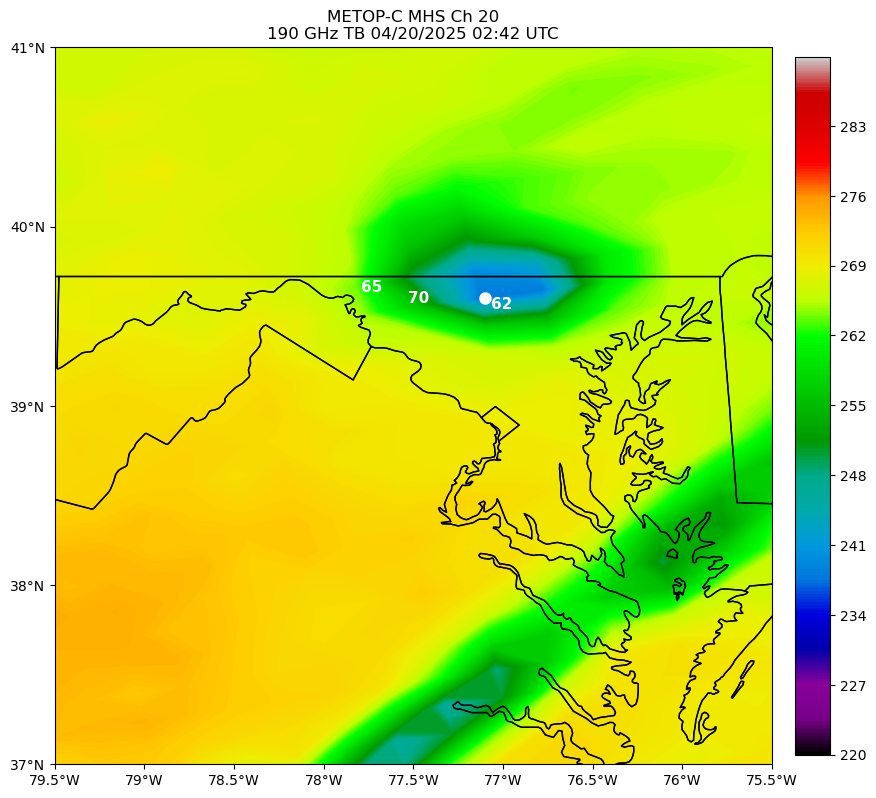

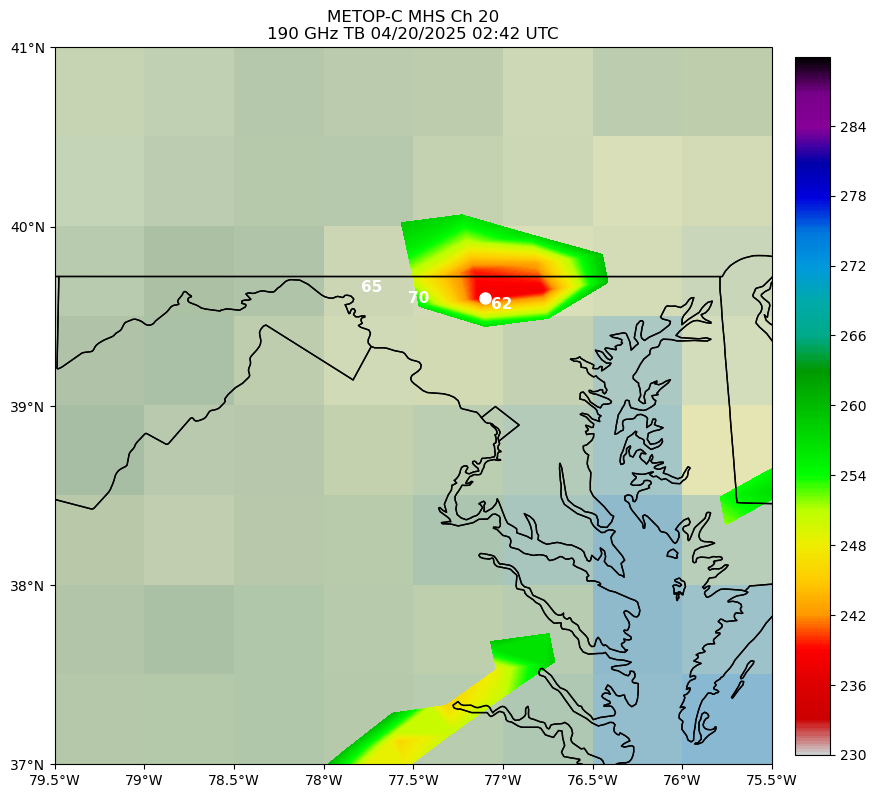

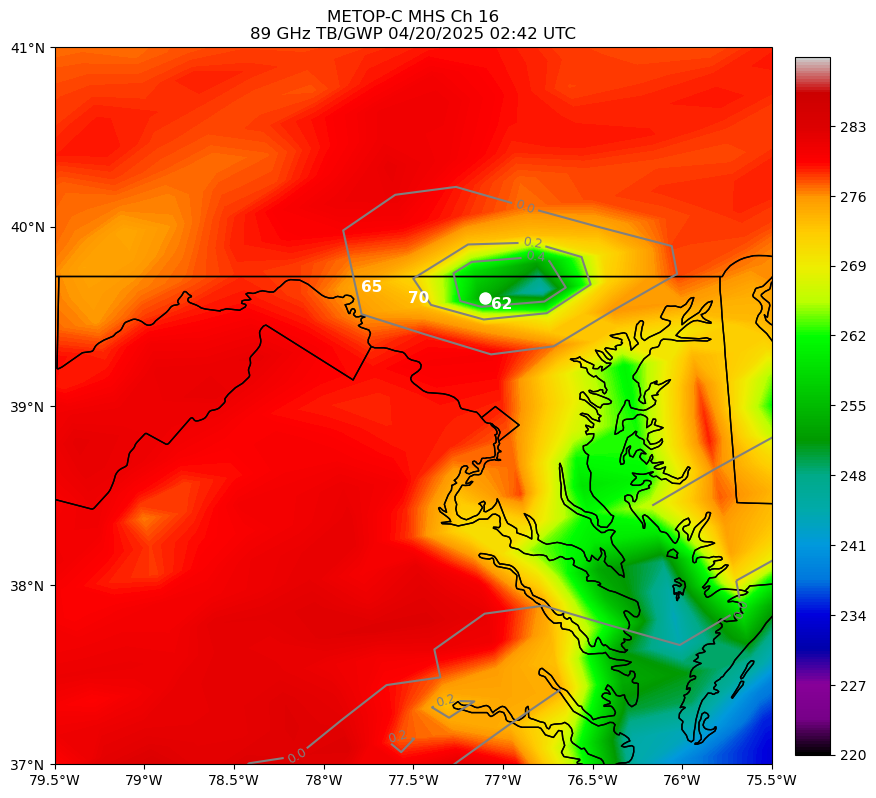

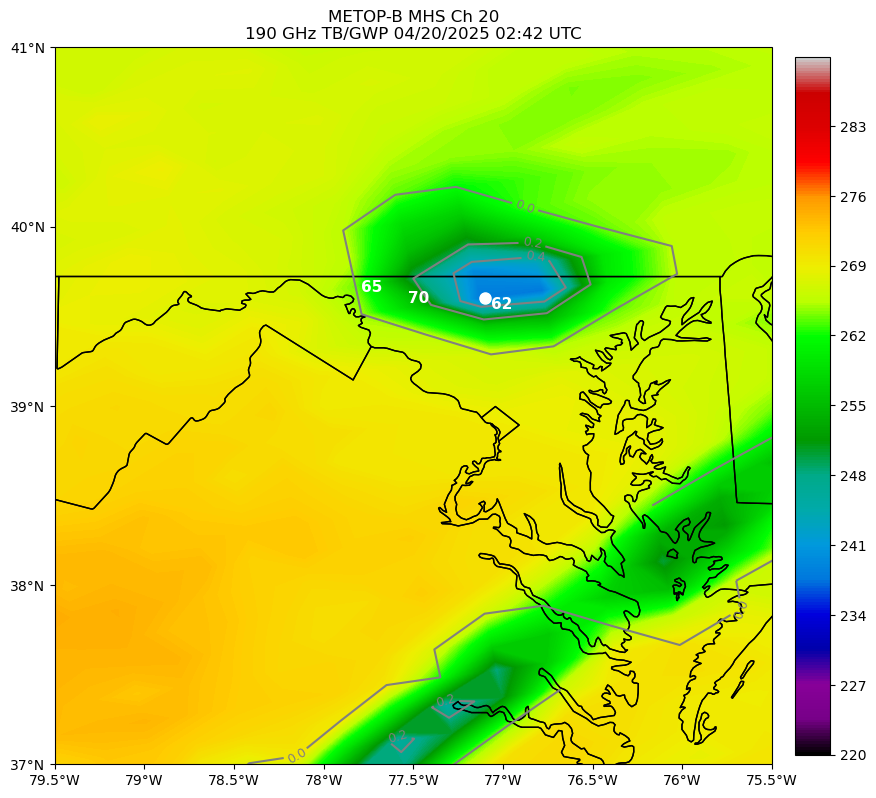

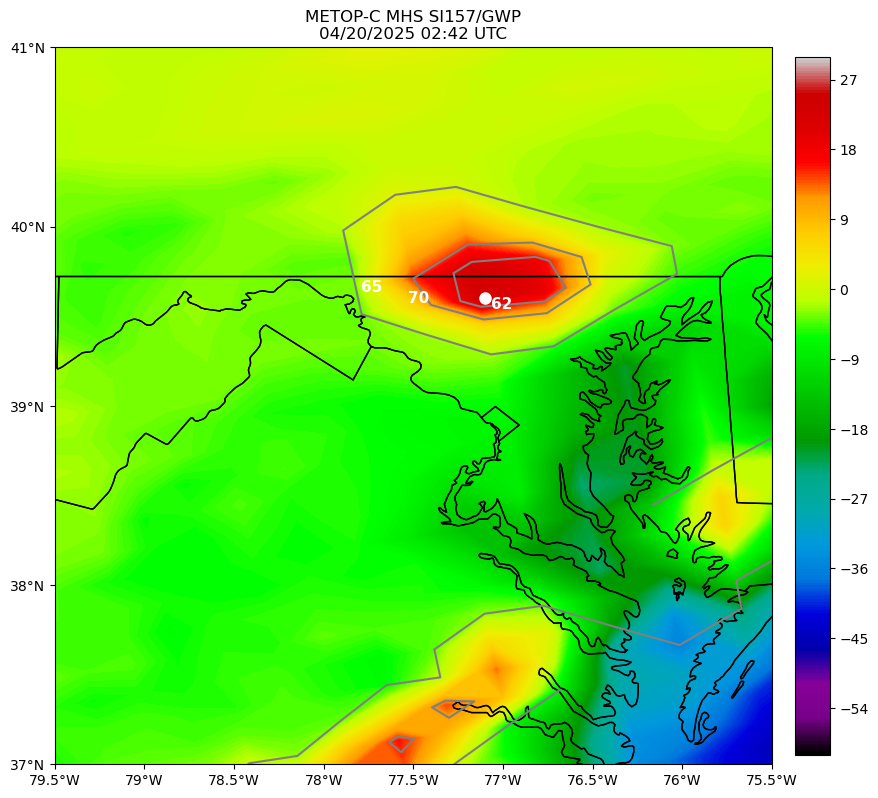

In [3]:
from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset 
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above
    freq = nc_fid.variables["Freq"][:]
    clw = nc_fid.variables["CLW"][:]
    gwp = nc_fid.variables["GWP"][:]
    lats = nc_fid.variables['Latitude'][:]  # extract/copy the data
    lons = nc_fid.variables['Longitude'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB, freq, clw, gwp, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

MHS_file = 'NPR-MIRS-IMG_v11r9_ma3_s202504200115380_e202504200257520_c202504200344000.nc'
TB, freq, clw, gwp, lats, lons, names = read_MHS_plot(MHS_file)
print("Frequency: ", freq)
TB16 = TB[1800:2100,:,15]
TB17 = TB[1800:2100,:,16]
TB20_ma3 = TB[1800:2100,:,19]
clw = clw[1800:2100,:]
gwp = gwp[1800:2100,:]
lats_ma3 = lats[1800:2100,:]
lons_ma3 = lons[1800:2100,:]
TB16_mn = np.mean(TB16)
TB17_mn = np.mean(TB17)
TB20_ma3_mn = np.mean(TB20_ma3)
clw_mn = np.mean(clw)
gwp_mn = np.mean(gwp)
lats_ma3_mn = np.mean(lats)
lons_ma3_mn = np.mean(lons)
print("TB16 mean = ", TB16_mn)
print("TB17 mean = ", TB17_mn)
print("TB20 mean = ", TB20_ma3_mn)
print("CLW mean = ", clw_mn)
print("GWP mean = ", gwp_mn)
print("Lats mean= ", lats_ma3_mn)
print("Lons mean= ", lons_ma3_mn)
TB16_max = np.amax(TB16)
TB16_min = np.amin(TB16)
TB17_max = np.amax(TB17)
TB17_min = np.amin(TB17)
TB20_ma3_max = np.amax(TB20_ma3)
TB20_ma3_min = np.amin(TB20_ma3)
gwp_filled_arr = gwp.filled(-1)
print("GWP filled = ", gwp_filled_arr)
TB20_mask_ma3 = ma.masked_where(gwp_filled_arr < 0.01, TB20_ma3)
print('TB20_mask_ma3 =', TB20_mask_ma3, TB20_mask_ma3.shape)
clw_min = np.amin(clw)
clw_max = np.amax(clw)
gwp_min = np.amin(gwp)
gwp_max = np.amax(gwp)
print("TB16 max =", TB16_max)
print("TB16 min =", TB16_min)
print("TB16 = ", TB16, TB16.shape)
print("TB17 max =", TB17_max)
print("TB17 min =", TB17_min)
print("TB17 = ", TB17, TB17.shape)
print("CLW max =", clw_max)
print("CLW min =", clw_min)
print("CLW = ", clw, clw.shape)
print("GWP max =", gwp_max)
print("GWP min =", gwp_min)
print("GWP = ", gwp, gwp.shape)
print("Lats = ", lats_ma3, lats.shape)
print("Lons = ", lons_ma3, lons.shape)

SI157 = TB16 - TB17
SI157_max = np.amax(SI157)
SI157_min = np.amin(SI157)
print("SI157 max =", SI157_max)
print("SI157 min =", SI157_min)
print("SI157 = ", SI157, SI157.shape)

"""
fn = 'C:/temp/test.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

time = ds.createDimension('time', None)
lats = ds.createDimension('lats', 200, 90)
lons = ds.createDimension('lons', 200, 90)

times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('lats', 'f4', ('lats',))
lons = ds.createVariable('lons', 'f4', ('lons',))
SI157 = ds.createVariable('SI157', 'f4', ('time', 'lat', 'lon',))
SI157.units = 'K'

print('var size after adding second data', SI157.shape)

ds.close()
"""
fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS Ch 16\n'
          '89 GHz TB 04/20/2025 02:42 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma3, lats_ma3, TB16, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB16_0242.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS SI157\n'
          '04/20/202 02:42 UTC')
levels = np.arange(-60,30,0.1)
mi = ax.contourf(lons_ma3, lats_ma3, SI157, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_SI157_0242.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS Ch 20\n'
          '190 GHz TB 04/20/2025 02:42 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma3, lats_ma3, TB20_ma3, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_0242.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS Ch 20\n'
          '190 GHz TB 04/20/2025 02:42 UTC')
levels = np.arange(230,290,0.1)
mi = ax.contourf(lons_ma3, lats_ma3, TB20_mask_ma3, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_mask_0242.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS Ch 16\n'
          '89 GHz TB/GWP 04/20/2025 02:42 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma3, lats_ma3, TB16, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons_ma3,lats_ma3,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB16_GWP_0242.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B MHS Ch 20\n'
          '190 GHz TB/GWP 04/20/2025 02:42 UTC')
levels = np.arange(220,290,0.1)
mi = ax.contourf(lons_ma3, lats_ma3, TB20_ma3, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons_ma3,lats_ma3,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_GWP_0242.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS SI157/GWP\n'
          '04/20/2025 02:42 UTC')
levels = np.arange(-60,30,0.1)
mi = ax.contourf(lons_ma3, lats_ma3, SI157, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons_ma3,lats_ma3,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_SI157_GWP_0242.png",dpi=250,bbox_inches='tight')
plt.show()

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z_0151 shape (689, 920) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z_0151 min, Z_0151 max nan nan
lat_0151 shape, lon_0151 shape (689,) (920,)
Z_0151 shape (689, 920) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z_0151_35 shape (689, 920)
Z_0151_40 shape (689, 920)
lats shape, lons shape (689, 920) (689, 920) [[36.34922529 36.34922529 36.34922529 ... 36.34922529 36.34922529
  36.34922529]
 [36.35672914 36.35672914 36.35672914 ... 36.35672914 36.35672914
  36.35672914]
 [36.36423299 36.36423299 36.36423299 ... 36.36423299 36.36423299
  36.36423299]
 ...
 [41.49686741 41.49686741 41.49686741 ... 41.49686741 41.49686741
  41.49686741]
 [41.50437126 

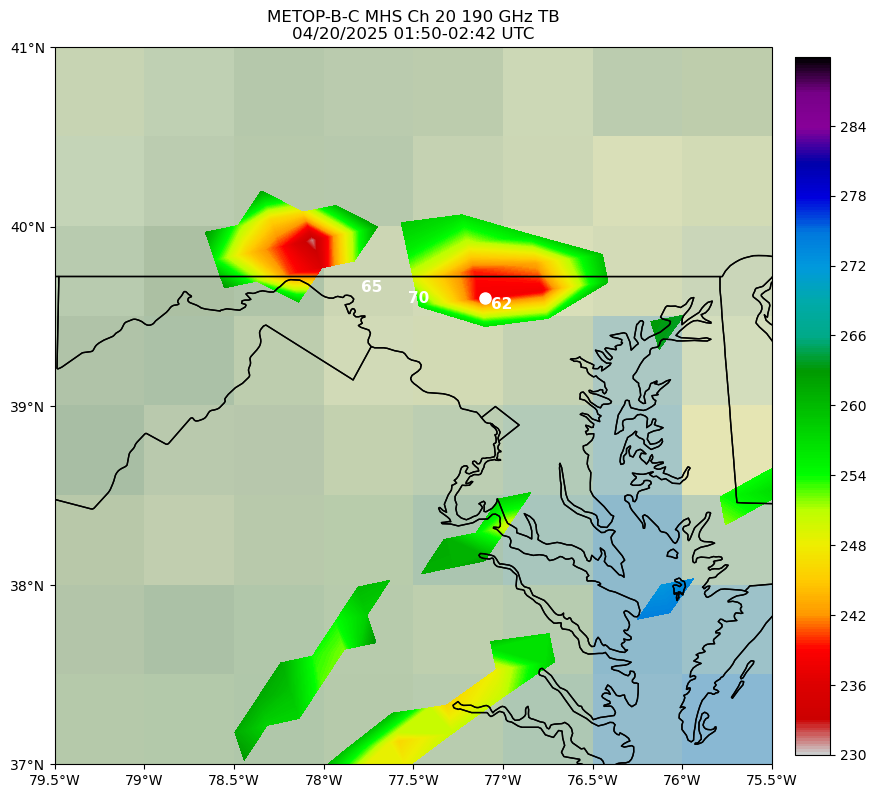

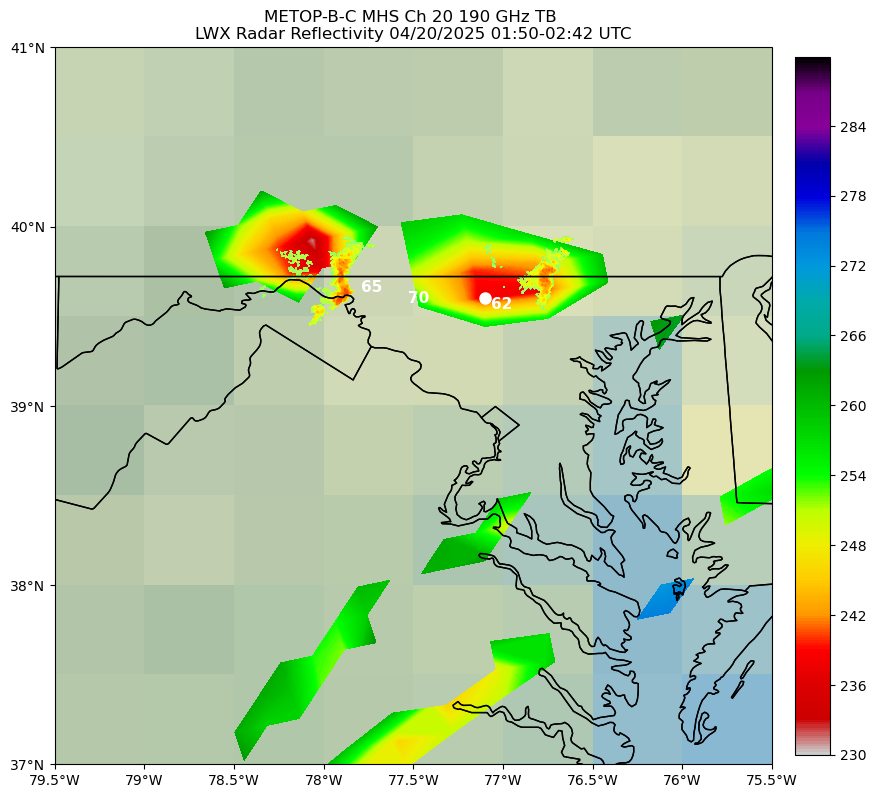

In [8]:
Z_file = 'KLWX_V06_20250420_015129.nc'
Z_0151, lat_0151, lon_0151, names = read_radar_plot(Z_file)
Z_0151 = Z_0151[0,:,:]
print(names)
print('Z_0151 shape', Z_0151.shape, Z_0151)
Z_0151_max = np.amax(Z_0151)
Z_0151_min = np.amin(Z_0151)
print('Z_0151 min, Z_0151 max', Z_0151_min, Z_0151_max)
print('lat_0151 shape, lon_0151 shape', lat_0151.shape, lon_0151.shape)

Z_0151[Z_0151>60]=59
print('Z_0151 shape', Z_0151.shape, Z_0151)

Z_0151_35 = ma.masked_where(Z_0151 < 35, Z_0151)
print('Z_0151_35 shape', Z_0151_35.shape)

Z_0151_40 = ma.masked_where(Z_0151 < 40, Z_0151)
print('Z_0151_40 shape', Z_0151_40.shape)

lonz_0151,latz_0151 = np.meshgrid(lon_0151,lat_0151)
print('lats shape, lons shape', latz_0151.shape, lonz_0151.shape, latz_0151, lonz_0151)

Z_file = 'KLWX_V06_20250420_023950.nc'
Z_0240, lat_0240, lon_0240, names = read_radar_plot(Z_file)
Z_0240 = Z_0240[0,:,:]
print(names)
print('Z_0240 shape', Z_0240.shape, Z_0240)
Z_0240_max = np.amax(Z_0240)
Z_0240_min = np.amin(Z_0240)
print('Z_0240 min, Z_0240 max', Z_0240_min, Z_0240_max)
print('lat_0240 shape, lon_0240 shape', lat_0240.shape, lon_0240.shape)

Z_0240[Z_0240>60]=59
print('Z_0240 shape', Z_0240.shape, Z_0240)

Z_0240_35 = ma.masked_where(Z_0240 < 35, Z_0240)
print('Z_0240_35 shape', Z_0240_35.shape)

Z_0240_40 = ma.masked_where(Z_0240 < 40, Z_0240)
print('Z_0240_40 shape', Z_0240_40.shape)

lonz_0240,latz_0240 = np.meshgrid(lon_0240,lat_0240)
print('lats shape, lons shape', latz_0240.shape, lonz_0240.shape, latz_0240, lonz_0240)

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B-C MHS Ch 20 190 GHz TB\n'
          '04/20/2025 01:50-02:42 UTC')
levels = np.arange(230,290,0.1)
mi2 = ax.contourf(lons_ma3, lats_ma3, TB20_mask_ma3, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
mi1 = ax.contourf(lons_ma1, lats_ma1, TB20_mask_ma1, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi1,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_mask_0150_0242.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-B-C MHS Ch 20 190 GHz TB \n'
          'LWX Radar Reflectivity 04/20/2025 01:50-02:42 UTC')
levels = np.arange(230,290,0.1)
mi2 = ax.contourf(lons_ma3, lats_ma3, TB20_mask_ma3, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
mi1 = ax.contourf(lons_ma1, lats_ma1, TB20_mask_ma1, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
Zlevels = np.arange(30,70,1)
cZ1 = ax.contourf(lonz_0151,latz_0151,Z_0151_35,Zlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=70)
cZ2 = ax.contourf(lonz_0240,latz_0240,Z_0240_35,Zlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=70)
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-77.1, 39.6, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.73, 39.70583, '65', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.468, 39.645, '70', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.00770, 39.60830, '62', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi1,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB20_mask_Z_0150_0242.png",dpi=250,bbox_inches='tight')
plt.show()

dict_keys(['time', 'time_bounds', 'lat', 'lat_bounds', 'lon', 'lon_bounds', 'cmorph'])
CMORPH: (200, 400) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
Latitude: (200, 400) [[34.63917449 34.63917449 34.63917449 ... 34.63917449 34.63917449
  34.63917449]
 [34.71194586 34.71194586 34.71194586 ... 34.71194586 34.71194586
  34.71194586]
 [34.78471724 34.78471724 34.78471724 ... 34.78471724 34.78471724
  34.78471724]
 ...
 [48.97513556 48.97513556 48.97513556 ... 48.97513556 48.97513556
  48.97513556]
 [49.04790694 49.04790694 49.04790694 ... 49.04790694 49.04790694
  49.04790694]
 [49.12067831 49.12067831 49.12067831 ... 49.12067831 49.12067831
  49.12067831]]
Longitude: (200, 400) [[269.23605363 269.3088103  269.38156697 ... 298.12045123 298.1932079
  298.26596457]
 [269.23605363 269.3088103  269.38156697 ... 298.12045123 298.1932079
  298.26596

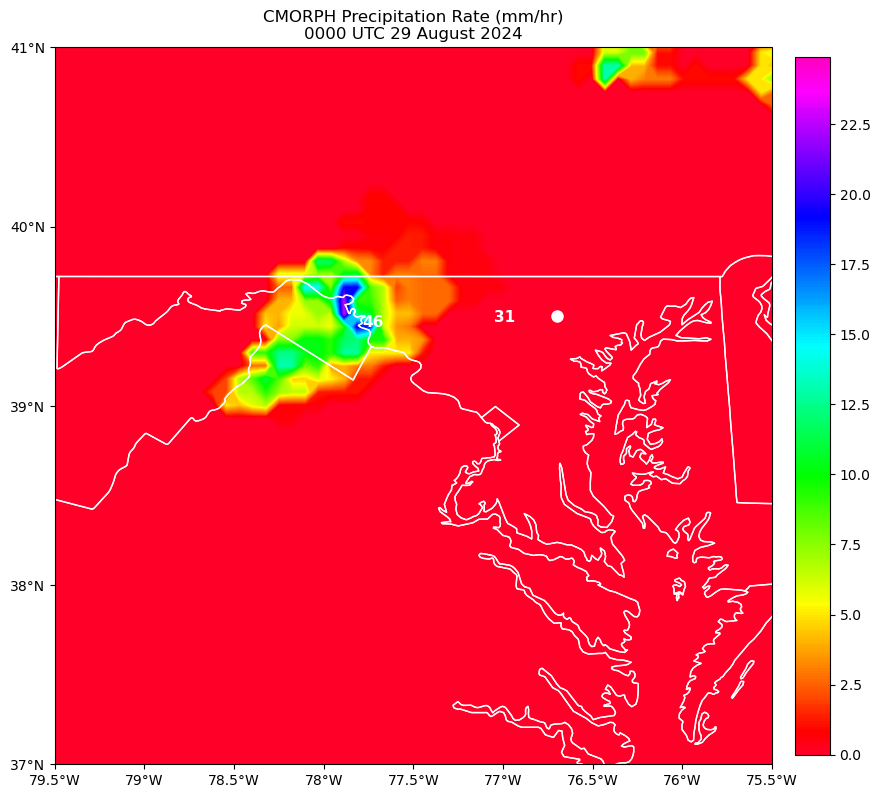

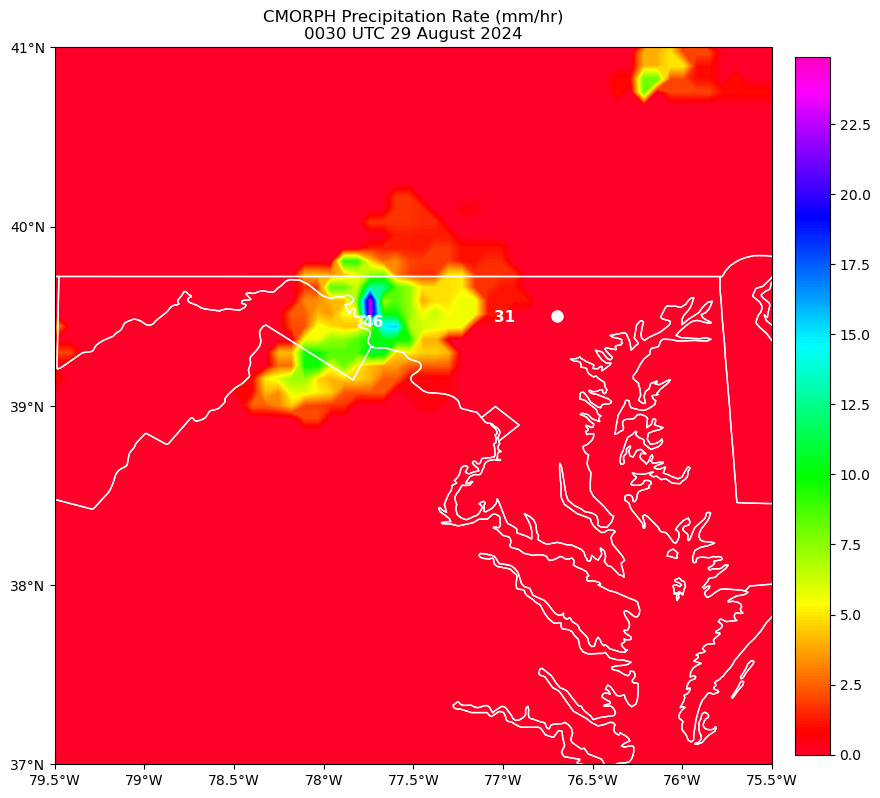

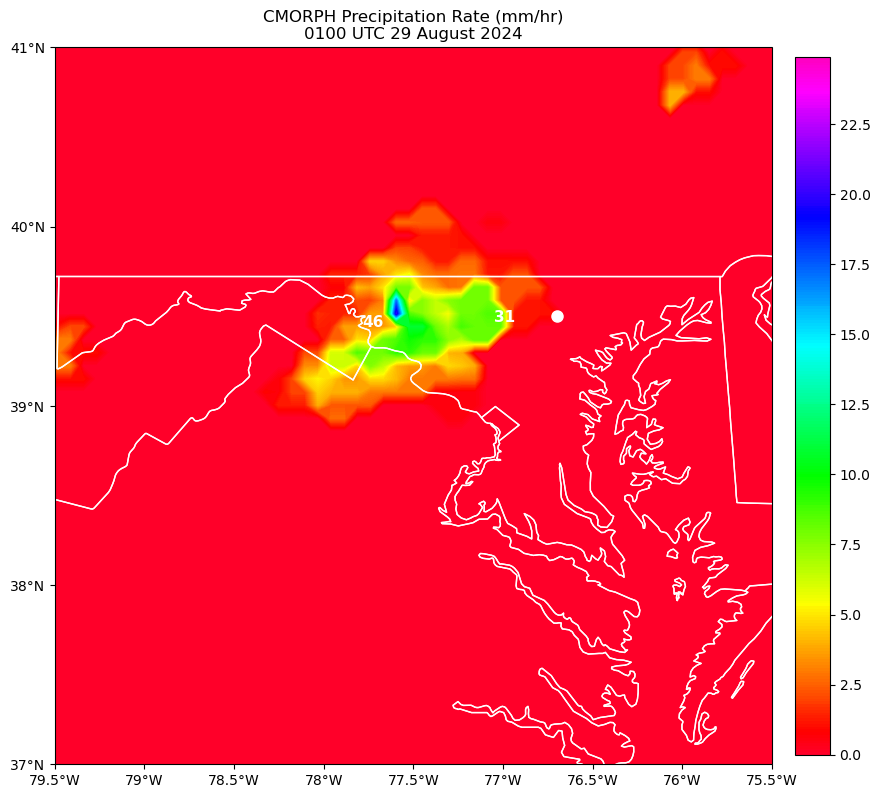

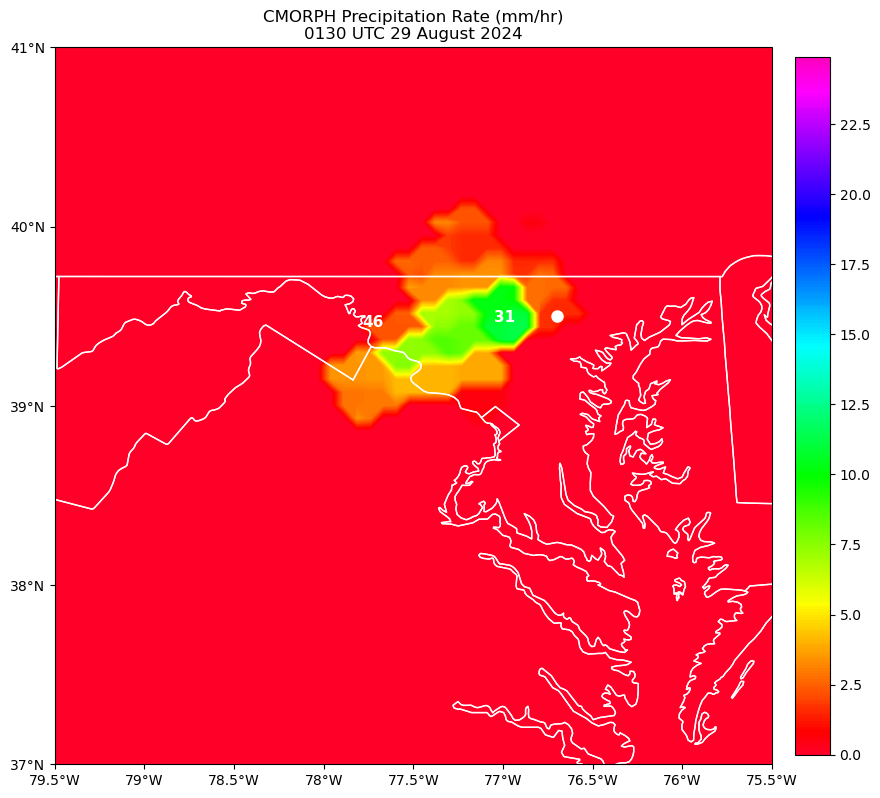

In [1]:
from __future__ import print_function, division
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm
import pandas as pd

def read_CMORPH_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    cmorph = nc_fid.variables["cmorph"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables["lat"][:]
    lon = nc_fid.variables["lon"][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return cmorph, lat, lon, names

cmorph_file = 'CMORPH_V0.x_ADJ_8km-30min_2024082900.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_0000 = cmorph[0,1300:1500,3700:4100]
cmorph_0000[cmorph_0000>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0000.shape, cmorph_0000)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

cmorph_0030 = cmorph[1,1300:1500,3700:4100]
cmorph_0030[cmorph_0030>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0030.shape, cmorph_0030)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

cmorph_file = 'CMORPH_V0.x_ADJ_8km-30min_2024082901.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_0100 = cmorph[0,1300:1500,3700:4100]
cmorph_0100[cmorph_0100>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0100.shape, cmorph_0100)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

cmorph_file = 'CMORPH_V0.x_ADJ_8km-30min_2024082901.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_0130 = cmorph[1,1300:1500,3700:4100]
cmorph_0130[cmorph_0130>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0100.shape, cmorph_0100)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0000 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0000,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0000.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0030 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0030,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0030.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0100 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0100,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0130 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0130,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0130.png",dpi=250,bbox_inches='tight')
plt.show()